In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob

## In this notebook, I will read in an image of a handwritten equation, draw bounding boxes around the seperate numbers and symbols, and crop them into seperate images from left to right in order to feed them into my model

### Load in equation image

In [2]:
# clear equation image directory for new equation images
files = glob.glob('../image_data/image_output/*')
for f in files:
    os.remove(f)

In [146]:
# Load in equation image. test_equations directory contains a small test set of handwritten equations.
# equation input directory can be used to input equation to be parsed

#img_path = '../image_data/test_equations/test7.jpeg'
img_path = '../image_data/equation_input/test.jpeg'
img = cv2.imread(img_path)

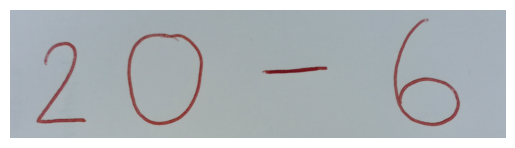

In [147]:
# View equation image
plt.imshow(img, cmap='binary')
plt.axis('off');

### Seperate Image into seperate symbol images

In [148]:
## The following code was addapted from from "https://www.appsloveworld.com/opencv/100/73/python-split-an-image-based-on-white-space"
## in order to prepare the image for drawing bounding boxes.

# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)

# set threshold
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

# recolor border to white
img[mask==255] = (255,255,255)

# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

# apply morphology open
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

In [149]:
# Find coordinates for bounding boxes
## The following code was addapted from from "https://www.appsloveworld.com/opencv/100/73/python-split-an-image-based-on-white-space"
## in order to prepare the image for drawing bounding boxes.

bboxes = []
bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(bboxes_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
    bboxes.append((x,y,w,h))

In [150]:
# get largest width of bboxes
maxwidth = max(bboxes)[2]

# sort bboxes on x coordinate
def takeFirst(elem):
    return elem[0]

bboxes.sort(key=takeFirst)

# seperate cropped images and write to file
i = 1
for bbox in bboxes:
    (x,y,w,h) = bbox
    crop = img[y - 40:y + h + 40, x-40:x + maxwidth + 30]
    cv2.imwrite(f'../image_data/image_output/eq_char{str(i)}.jpg', crop)
    i += 1
# save indermediate results
cv2.imwrite('../image_data/processed_images/img_mask.jpg', mask)
cv2.imwrite('../image_data/processed_images/img_white_border.jpg', img)
cv2.imwrite('../image_data/processed_images/img_thresh.jpg', thresh)
cv2.imwrite('../image_data/processed_images/img_morph.jpg', morph)
cv2.imwrite('../image_data/processed_images/img_bboxes.jpg', bboxes_img)


True